In [1]:
#Importing all the libraries needed for the model

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import  accuracy_score 
import time

## Importing data 

In [2]:
data = pd.read_csv('bank.csv')

## Validating data import

#### Checking the shape

In [3]:
#Expecting (15111, 17) since the data contains 17 columns and 15111 rows according to "bank attributes.txt"
data.shape

(15111, 17)

#### Previewing the data

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no


## Check the distribution of Class (subscribed)

#### Print distribution as percentages to the console.

In [5]:
dis = data.subscribed.value_counts(normalize=True)
dis=dis.apply(lambda x: round(100*x,2))
print(dis)

no     79.45
yes    20.55
Name: subscribed, dtype: float64


#### Print the distributions

In [6]:
data.subscribed.value_counts()

no     12005
yes     3106
Name: subscribed, dtype: int64

#### Plot the distribution

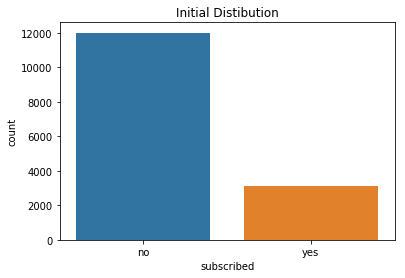

In [7]:
sb.countplot(x='subscribed', data=data)
plt.title('Initial Distibution')
plt.show()

## Checking for the number of missing values

In [8]:
data.isnull().sum()

age             0
job            69
marital        12
education      31
default        51
balance         1
housing        15
loan            0
contact        30
day           123
month         112
duration        0
campaign        0
pdays          20
previous        0
poutcome        0
subscribed      0
dtype: int64

In [9]:
temp = data.copy()
temp.dropna(inplace=True)
missing_values = data.shape[0] - temp.shape[0]
print("% of instances with missing values is", round((missing_values/data.shape[0] *100),2))

% of instances with missing values is 1.93


## Checking for other interesting patterns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 17 columns):
age           15111 non-null int64
job           15042 non-null object
marital       15099 non-null object
education     15080 non-null object
default       15060 non-null object
balance       15110 non-null float64
housing       15096 non-null object
loan          15111 non-null object
contact       15081 non-null object
day           14988 non-null float64
month         14999 non-null object
duration      15111 non-null int64
campaign      15111 non-null int64
pdays         15091 non-null float64
previous      15111 non-null int64
poutcome      15111 non-null object
subscribed    15111 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 2.0+ MB


In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,15111.000000,15110.000000,14988.000000,15111.000000,15111.000000,15091.000000,15111.000000
mean,41.050758,1277.701059,13.337737,268.274701,2.284495,56.443509,0.872742
std,12.411636,3133.371164,6.926510,252.733311,2.155380,117.966131,2.334109
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,70.000000,8.000000,115.000000,1.000000,-1.000000,0.000000
50%,38.000000,393.000000,13.000000,195.000000,2.000000,-1.000000,0.000000
75%,49.000000,1326.000000,18.000000,333.000000,3.000000,78.000000,1.000000
max,95.000000,102127.000000,31.000000,3785.000000,43.000000,871.000000,58.000000


# Data Prepocessing

#### Handling instances with Missing values

In [12]:
#Removing missing values
data.dropna(inplace=True)

In [13]:
#Checking the number of instances after deleting rows with missing values
data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### Validating the data
Before any further preprocessing, we validate that the dataframe contains data as it is described in the 'bank attributes.txt' file.

In [14]:
cols = data.columns.tolist()

for col in cols:
    print (col)
    print ("-------------------------------------------------")
    print(data[col].unique()) # prints unique values in every column
    print("\n")
    


age
-------------------------------------------------
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 22 61 21 20 83 78 73 64 79 68
 19 66 71 63 80 69 72 70 62 82 67 65 81 75 74 77 18 76 89 84 86 95 87 92
 85 90 93 88]


job
-------------------------------------------------
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital
-------------------------------------------------
['married' 'single' 'divorced']


education
-------------------------------------------------
['tertiary' 'secondary' 'unknown' 'primary']


default
-------------------------------------------------
['no' 'yes']


balance
-------------------------------------------------
[2.143e+03 2.900e+01 2.000e+00 ... 1.511e+03 1.475e+03 1.729e+03]


housing
-------------------------------------------------
['yes' 'no']


loan
-----------------------------

#### Transforming attributes that are labeled 'binary' into numerical values 

default, housing, loan and subscribed(Class) are labeled as binary in the 'bank attributes.txt' file. 

In [15]:
#Label encoding attributes with binary data i.e "yes" and "no"

binary_attributes = ["default","housing","loan","subscribed"]
for attribute in binary_attributes:
    data[attribute] = pd.Categorical(data[attribute])
    data[attribute] = data[attribute].cat.codes
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5.0,may,261,1,-1.0,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5.0,may,151,1,-1.0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5.0,may,76,1,-1.0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5.0,may,92,1,-1.0,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5.0,may,198,1,-1.0,0,unknown,0


#### Transforming month data to numerical values

According to the 'bank attributes.txt' file, the months represent the last month a user was contacted. Therefore the months can be compared in value. For example, if a user was contacted in Jan, the time they were contacted is greater than that of a user contacted in Feb.

In [16]:
# Label encoding month data to ordered labels

ordered_month = ["jan", "feb", "mar", "apr","may","jun","jul","aug","sep","oct","nov","dec"]
data["month"] = pd.Categorical(data["month"], categories = ordered_month, ordered = True)
data["month"] = data["month"].cat.codes
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5.0,4,261,1,-1.0,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5.0,4,151,1,-1.0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5.0,4,76,1,-1.0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5.0,4,92,1,-1.0,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5.0,4,198,1,-1.0,0,unknown,0


#### Transforming the remaining categorical attributes to numerical values

For values that cannot be compared in value, they are transformed using one hot encoding.

In [17]:
data = pd.get_dummies(data, columns=["job", "marital","education","contact","poutcome"], prefix=["job", "marital","education","contact","poutcome"])
data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5.0,4,261,1,-1.0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29.0,1,0,5.0,4,151,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2.0,1,1,5.0,4,76,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506.0,1,0,5.0,4,92,1,-1.0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1.0,0,0,5.0,4,198,1,-1.0,...,0,0,1,0,0,1,0,0,0,1


In [18]:
# # Sample figsize in inches
# fig, ax = plt.subplots(figsize=(20,10))         
# # Imbalanced DataFrame Correlation
# corr = data.corr()
# sb.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
# ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
# plt.show()

#### Balancing the data

Since we observed earlier that the data is not balanced i.e there are significantly more values for non-subscribers than than that of subscribers, we sample the larger category in order to eliminate bias.

In [19]:
#Shuffle the dataset

shuffled_data = data.sample(frac=1, random_state=90) #random_state is a seed for the random number generator
shuffled_data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8567,32,0,9714.0,1,0,15.0,4,1237,2,361.0,...,1,0,0,1,0,0,1,0,0,0
14077,49,0,725.0,0,1,14.0,6,70,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
3177,35,1,-12.0,0,1,20.0,5,714,4,-1.0,...,1,0,0,0,0,1,0,0,0,1
7042,41,0,145.0,0,0,22.0,6,1833,2,-1.0,...,0,1,0,1,0,0,0,0,0,1
766,44,0,161.0,1,0,7.0,4,89,2,-1.0,...,1,0,0,0,0,1,0,0,0,1


In [20]:
# Put all the subscribed class in a separate dataset.
subscribed = shuffled_data.loc[shuffled_data['subscribed'] == 1]

#n is the number of records in the subscribed class
num_records = subscribed.shape[0]
subscribed.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
7042,41,0,145.0,0,0,22.0,6,1833,2,-1.0,...,0,1,0,1,0,0,0,0,0,1
12831,23,0,897.0,1,0,8.0,1,190,2,280.0,...,0,1,0,1,0,0,1,0,0,0
9151,34,0,-1.0,1,0,18.0,4,1057,6,355.0,...,0,0,0,1,0,0,0,1,0,0
6220,42,0,301.0,1,0,17.0,6,1175,2,-1.0,...,0,0,0,1,0,0,0,0,0,1
12944,30,0,2424.0,0,0,15.0,1,337,1,95.0,...,1,0,0,1,0,0,0,0,1,0


In [21]:
# Randomly select 3031 non-subscribed from the subscribed data 
#calculate and use the variable here.
non_subscribed = shuffled_data.loc[shuffled_data['subscribed'] == 0].sample(n=num_records, random_state =81)
non_subscribed.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8408,42,0,169.0,1,0,15.0,4,87,4,-1.0,...,1,0,0,0,1,0,0,0,0,1
5380,58,0,327.0,0,1,14.0,6,145,2,-1.0,...,0,1,0,1,0,0,0,0,0,1
14881,52,0,553.0,1,0,11.0,9,160,1,-1.0,...,1,0,0,0,1,0,0,0,0,1
2958,52,0,2024.0,1,0,14.0,4,314,1,-1.0,...,0,0,0,0,0,1,0,0,0,1
9340,39,0,385.0,0,0,25.0,4,644,1,-1.0,...,1,0,0,1,0,0,0,0,0,1


In [22]:
# Concatenate both dataframes again
normalized_data = pd.concat([subscribed, non_subscribed])
normalized_data.shape

(6062, 38)

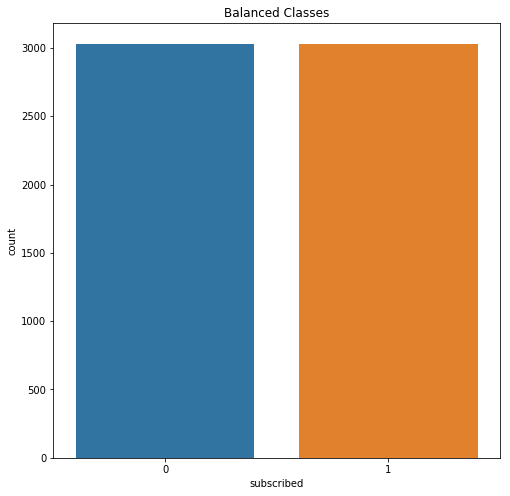

In [23]:
# Show distribution after balancing data
plt.figure(figsize=(8, 8))
sb.countplot(x='subscribed', data=normalized_data)
plt.title('Balanced Classes')
plt.show()

#### Splitting data into training and testing sets

In [24]:
cols = normalized_data.columns.tolist()
print(cols)

['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


After the preprocessing, the class(subscribed) is in the middle making it hard to find. It is therefore rearranged to be the last column to allow the easier processing and readability.

In [25]:
#Rearranging the columns to place the Class at the end.
index = cols.index('subscribed')
cols = cols[:index]+cols[index+1:]+[cols[index]]
normalized_data = normalized_data[cols]
normalized_data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
7042,41,0,145.0,0,0,22.0,6,1833,2,-1.0,...,1,0,1,0,0,0,0,0,1,1
12831,23,0,897.0,1,0,8.0,1,190,2,280.0,...,1,0,1,0,0,1,0,0,0,1
9151,34,0,-1.0,1,0,18.0,4,1057,6,355.0,...,0,0,1,0,0,0,1,0,0,1
6220,42,0,301.0,1,0,17.0,6,1175,2,-1.0,...,0,0,1,0,0,0,0,0,1,1
12944,30,0,2424.0,0,0,15.0,1,337,1,95.0,...,0,0,1,0,0,0,0,1,0,1


In [26]:
#Assigning predictor variables to X (features to be used in the training)

X = normalized_data.iloc[:, :-1]
X.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
7042,41,0,145.0,0,0,22.0,6,1833,2,-1.0,...,0,1,0,1,0,0,0,0,0,1
12831,23,0,897.0,1,0,8.0,1,190,2,280.0,...,0,1,0,1,0,0,1,0,0,0
9151,34,0,-1.0,1,0,18.0,4,1057,6,355.0,...,0,0,0,1,0,0,0,1,0,0
6220,42,0,301.0,1,0,17.0,6,1175,2,-1.0,...,0,0,0,1,0,0,0,0,0,1
12944,30,0,2424.0,0,0,15.0,1,337,1,95.0,...,1,0,0,1,0,0,0,0,1,0


In [27]:
#Assigning the target variable to y(target or class to be determined by the algorithm)

y = normalized_data.iloc[:, -1:]
y.head()

,subscribed
7042,1
12831,1
9151,1
6220,1
12944,1


In [28]:
#Splitting the dataset into training data and test data
#An 80/20 split is recommended 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

#### Scaling the data

In [29]:
# Scaling the data
  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  
/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Training

In [30]:
#Training
# Check how fast the model trains

start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (37, 15, 10), max_iter=500, warm_start=True)  

mlp.fit(X_train, y_train.values.ravel())   
end = time.time()


# Tuning, Testing and Evaluation

In [31]:
#Testing

predictions = mlp.predict(X_test) 

In [32]:
#Evaluating and Assessing the Data
ex_time= end - start

#Print the accuracy score
print ('Accuracy Score :',round(accuracy_score(y_test, predictions),2))
print ('Execution Time: ', round(ex_time,2))


Accuracy Score : 0.75
Execution Time:  13.7


#### Removing noise

In [33]:
corr = normalized_data.corr()

In [34]:
corr_sub = dict(corr.subscribed)
noise = {k: v for k, v in corr_sub.items() if abs(v) < 0.2}
noise_keys = list(noise.keys())
noise_keys.pop(noise_keys.index('poutcome_other'))
noise_keys.pop(noise_keys.index('poutcome_failure'))
noise_keys.pop(noise_keys.index('contact_telephone'))
noise_keys

['age',
 'default',
 'balance',
 'loan',
 'day',
 'month',
 'campaign',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown']

Dropping all the columns with a correlation less than 0.2 because they do not affect the model that much. This makes the model faster since it has to process less data point.

In [35]:
normalized_data.drop(noise_keys, axis=1, inplace=True)
normalized_data.shape

(6062, 12)

Running the same model with the same parameters on the resized data_set

In [36]:
X = normalized_data.iloc[:, :-1]
y = normalized_data.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
start = time.time() 
mlp = MLPClassifier(hidden_layer_sizes = (37, 15, 10), max_iter=500, warm_start=True) 
mlp.fit(X_train, y_train.values.ravel())  #Using the same parameters as the first run. 
end = time.time()
predictions = mlp.predict(X_test) 
ex_time= end - start
print ('Accuracy Score :',round(accuracy_score(y_test, predictions),2))
print ('Execution Time: ', round(ex_time,2))

/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  """
/home/morema/Projects/BigData/coursework/coursework/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by StandardScaler.
  


Accuracy Score : 0.78
Execution Time:  3.39


#### Tuning the model with GridSearchCV

In [37]:
print(1)

1


In [38]:
parameter_space = {
    'hidden_layer_sizes': [(37,20,15), (12,6,3), (12,), ],
    'learning_rate': ['constant','adaptive'],
    'random_state': list(range(1,10))
}
mlp = MLPClassifier(max_iter=500)
grid_search_cv = GridSearchCV(mlp, parameter_space, cv=10)
grid_search_cv.fit(X_train, y_train.values.ravel())
predictions = grid_search_cv.predict(X_test) 
print('Best parameters found:\n', grid_search_cv.best_params_)



Best parameters found:
 {'hidden_layer_sizes': (12,), 'learning_rate': 'constant', 'random_state': 3}


#### Evaluating the model with best parameters

In [39]:
start = time.time() 
mlp = MLPClassifier(hidden_layer_sizes = (12),learning_rate ='constant', random_state=8, max_iter=500, warm_start=True) 
mlp.fit(X_train, y_train.values.ravel())  #Using the same parameters as the first run. 
end = time.time()
predictions = mlp.predict(X_test) 
ex_time= end - start
print ('Accuracy Score :',round(accuracy_score(y_test, predictions),2))
print ('Execution Time: ', round(ex_time,2))

Accuracy Score : 0.79
Execution Time:  3.76
